# **Proyecto 1 BI - Etapa 1: Construcción de Modelos de Analítica de Textos**

### Grupo 20


Andrea Galindo Cera - 202122477

Santiago Navarrete Varela - 202211202

Luis Fernando Ruiz - 202211513

# **Entendimiento del Negocio y Enfoque Analítico**

1. **Oportunidad / Problema Negocio**
  
  El proyecto busca automatizar el análisis de opiniones ciudadanas para relacionarlas con los ODS 3 (Salud y Bienestar), 4 (Educación de Calidad) y 5 (Igualdad de Género). Esto permitirá a las organizaciones como el UNFPA mejorar su comprensión de las problemáticas locales y diseñar intervenciones más efectivas. Dado que la cantidad de datos de las opiniones es enorme y dificil de categorizar, la oportunidad de negocio recae en nuestra habilidad de analizar y clasificar grandes volúmenes de datos de manera rápida y eficiente.



2. **Objetivos y criterios de éxito desde el punto de vista del negocio.**  
  Desarrollar un modelo analítico que pueda categorizar automáticamente las opiniones de los ciudadanos en relación con los ODS 3, 4 y 5 y aumentar la eficiencia en el análisis de grandes volúmenes de datos textuales.
  Los criterios de éxito incluyen alcanzar una precisión del modelo del 90% o más y reducir el tiempo de análisis a la mitad en comparación con métodos manuales.



3. **Organización y rol dentro de ella que se beneficia con la oportunidad definida**

  El Fondo de Poblaciones de las Naciones Unidas (UNFPA) se beneficiará directamente. Los analistas de políticas, responsables de evaluar y mejorar programas relacionados con los ODS, podrán usar los resultados del modelo para tomar decisiones más informadas.



4. **Impacto que puede tener en Colombia este proyecto.**

   En Colombia, este proyecto facilitará la identificación de necesidades críticas en salud, educación y equidad de género, mejorando así la calidad de vida y ayudando a cumplir los objetivos establecidos por los ODS para el año 2030. La información obtenida podrá ser utilizada por entidades gubernamentales y organizaciones no gubernamentales para diseñar políticas más efectivas, mejorando la calidad de vida de las comunidades locales.

5. **Enfoque Analítico**:

    **Descripción de la categoría de análisis**: El análisis será de tipo predictivo, utilizando modelos de aprendizaje automático (machine learning) para clasificar las opiniones de los ciudadanos.

    **Tipo y tarea de aprendizaje**: Clasificación supervisada. La tarea es categorizar las opiniones textuales entre 3 opciones de categoría (ODS 3, 4 o 5).

    **Técnicas y algoritmos propuestos**:
    
    -  **Técnicas**: Procesamiento del Lenguaje Natural (NLP) para la preparación de datos y extracción de características.

    - **Algoritmos**: Se tomó la decisión de usar los modelos de Naive Bayes, Support Vector Machines (SVM), y Redes Neuronales Recurrentes (RNN) para la clasificación de textos.



In [44]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect

# Manejo de gráficas
!pip install scikit-plot

# Keras in the pipeline
!pip install scikeras

In [45]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk

# Punkt permite separar un texto en frases.
nltk.download('punkt')

# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# Importaciones básicas
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import matplotlib.pyplot as plt

# Preprocesamiento de texto
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Modelos y herramientas de scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Herramientas adicionales
from joblib import dump, load
from scipy import stats as st

# Keras para modelos de deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier


In [47]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

opinion_df = pd.read_excel("ODScat_345.xlsx")
train_df = pd.read_excel("ODScat_345.xlsx")

# **Entendimiento de los Datos**

En esta sección, nos enfocamos en explorar y comprender el conjunto de datos de opiniones textuales que utilizaremos para nuestros modelos de clasificación. El objetivo de esta fase es obtener una visión clara de las características de los datos, identificar posibles problemas de calidad de datos, y realizar un análisis que nos ayude a preparar mejor los datos para el modelado.

Mostramos las primeras filas del DataFrame para tener una vista previa del contenido de cada columna, identificando el tipo de datos y su estructura. Esto ayuda a confirmar que los datos se han cargado correctamente y que las columnas contienen la información esperada.


In [48]:
opinion_df.head(15)

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
5,Probar pronto la medicina rural puede crear el...,3
6,La duración media de la estancia en el hospita...,3
7,"El período retrospectivo es de 20 años, de 195...",3
8,Ya se están vinculando algunos datos de los re...,3
9,"En este sentido, es una forma eficaz de mejora...",3


Encontramos en el set datos que ambos columnas son categóricas ya que a pesar de que sdg sea de tipo int esta representa una categoria de las ODS

In [49]:
print(opinion_df.dtypes)


Textos_espanol    object
sdg                int64
dtype: object


Ahora, mostramos la información acerca del dataframe cargado. Esto nos da una vista preliminar del tipo de datos que son las columnas, la cantidad de datos No-Nulos y la cantidad de columnas

In [50]:
opinion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


## Completitud

In [51]:
# Contar valores nulos por columna
opinion_df.isnull().sum()

,0
Textos_espanol,0
sdg,0


Como vemos, No existen datos Nulos o Faltantes. Por lo tanto, en cuanto a completitud se encuentra bien

## Unicidad

In [52]:
# Contar filas duplicadas exactamente
print("Cantidad filas duplicadas exactamente: ",opinion_df.duplicated().sum())

# Contar el total de filas duplicadas sin la variable Objetivo
print("Cantidad opiniones duplicadas: ", opinion_df["Textos_espanol"].duplicated().sum())

Cantidad filas duplicadas exactamente:  0
Cantidad opiniones duplicadas:  0


Tampoco existen columnas ducplicadas, ya sea contando la variable objetivo o no teniendola en cuenta. Por lo tanto, en cuanto a Unicidad, los datos se encuentran bien

In [53]:
# Mostrar los valores únicos de las columnas categóricas
for column in opinion_df.select_dtypes(include='object').columns:
    print(f"{column} - Valores únicos: {opinion_df[column].nunique()}")
    print(opinion_df[column].value_counts())

Textos_espanol - Valores únicos: 4049
Textos_espanol
Las áreas útiles para un mayor estudio y acción política incluyen: la disponibilidad rutinaria de datos desglosados ​​por género, la incorporación de enfoques específicos de género dentro de las rutinas anuales normales de presupuestación y la complementación de enfoques dirigidos por ejecutivos con garantía de calidad externa. El uso de dichos datos por parte de la OCDE es sin perjuicio del estado de los Altos del Golán, Jerusalén Este y los asentamientos israelíes en Cisjordania según los términos del derecho internacional. Hoy en día muchas disparidades y desigualdades entre los sexos parecen haberse incrustado, en mayor o menor medida, en la línea base de las políticas públicas y la asignación de recursos públicos.                                                                                                                                                                                                                           

## Validez

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64




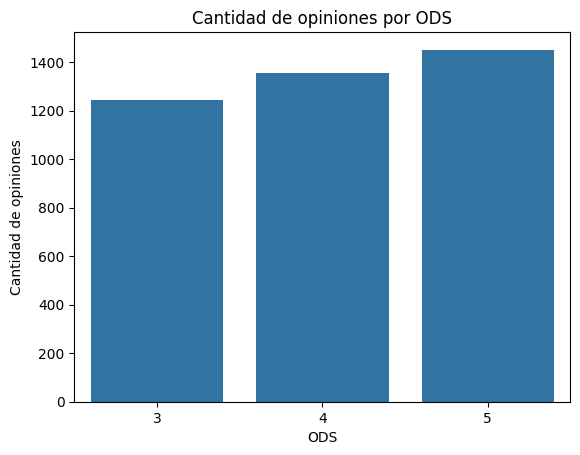

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

print(opinion_df["sdg"].value_counts())
print("\n")

sns.countplot(data=opinion_df, x='sdg')
plt.title("Cantidad de opiniones por ODS")
plt.xlabel("ODS")
plt.ylabel("Cantidad de opiniones")
plt.show()

Como se ve en la gráfica y en la tabla. No existen datos que no sean válidos con respecto a los ODS que se quieren trabajar.

## Consistencia
Para poder determinar si el conjunto de datos es consistente, sería necesario verificar con un experto si es verdad que cada una de esas opiniones se refiere al ODS que dice. Sin embargo, en esta oportunidad vamos a asumir que, al ser un conjunto de datos entregados por los líderes del proyecto (Profesores de Clase), los datos son correctos y si son consistentes.

#Perfilamiento de Datos

## Perfilamiento Automático
En este caso, se realiza un perfilamiento automático de los datos, con la ayuda de la librería `pandas-profiling`. La cual nos ayuda a generar un reporte completo de como se encuentran los datos.

El reporte se guardará en el archivo _profiling.html_

In [55]:
#from pandas_profiling import ProfileReport

# profile = ProfileReport(opinion_df, title="Reporte de Perfilamiento", html={'style' : {'full_width':True}})
# profile.to_file(output_file="profiling.html")

## Perfilamiento Manual

Ahora, cogemos la variable objetivo `sdg`, la cual nos dice a que ODS hace referencia una opinion. Y por medio de un .describe() podemos revisar ver ciertas estadísticas descriptivas que nos pueden ayudar a entender mejor como se distribuyen las opiniones

In [56]:
opinion_df["sdg"].describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [57]:
opinion_df["sdg"].value_counts()

,count
sdg,
5,1451
4,1354
3,1244


<BarContainer object of 3 artists>

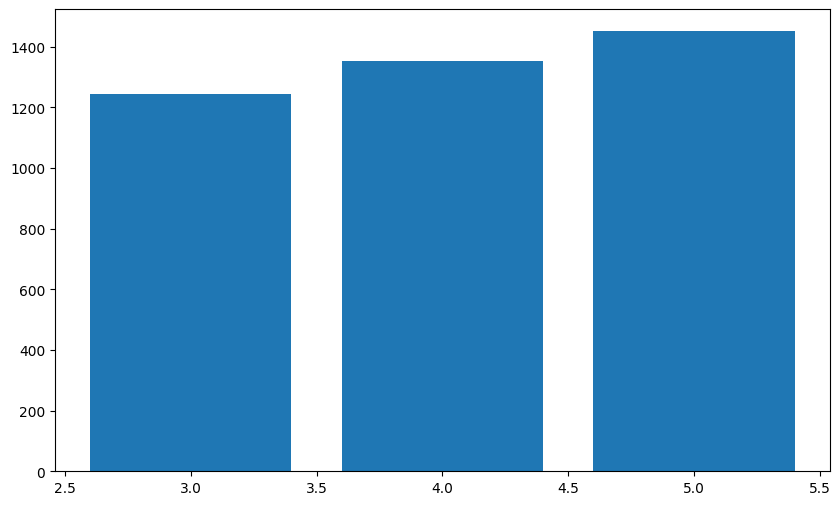

In [58]:
# verlo en una gráfica
plt.figure(figsize=(10, 6))
plt.bar(opinion_df["sdg"].value_counts().index, opinion_df["sdg"].value_counts().values)

Como vemos, La cantidad de datos está uniformente distribuida. Lo cual es bueno para tener un set de entrenamiento balanceado. Esto es muy beneficioso para el modelo

In [59]:
textos = opinion_df.copy()

textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]

textos['Moda'] = textos['Conteo'].mode()[0]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

textos

,Textos_espanol,sdg,Conteo,Moda,Max,Min
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,559,18,1
1,"En 2007, el gobierno central financió directam...",3,476,559,14,1
2,"Claramente, hay muchos otros factores en juego...",3,1207,559,15,1
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,559,17,1
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,559,13,1
...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,559,16,1
4045,La participación de las mujeres en roles de li...,5,514,559,16,1
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,559,17,1
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,559,15,1


**Conteo de caracteres** (Conteo):

-   Esta columna muestra cuántos caracteres tiene cada texto. En tu muestra, los textos parecen variar en longitud, desde textos cortos hasta muy largos (por ejemplo, el texto en la fila 3 tiene 1090 caracteres).

**Moda** (Moda):

- La moda del conteo de caracteres es 559, lo que significa que la longitud de texto más común entre todas las opiniones es de 559 caracteres.

**Longitud máxima de palabras**(Max):

- La columna Max muestra la longitud de la palabra más larga en cada texto. Por ejemplo, la fila 0 tiene una palabra con 18 caracteres, lo que puede indicar palabras técnicas o nombres propios largos.

**Longitud mínima de palabras** (Min):

- La columna Min muestra la longitud de la palabra más corta en cada texto. La mayoría de las veces, estas son palabras cortas como "a", "y", "el", etc., lo cual es típico en la mayoría de los textos.

Teniendo en cuenta este analisis, las transformaciones de los datos podrían estar dirigidas a normalizar las opiniones. Por ejemplo, quitar tildes, caracteres especiales y llevandolas a su forma raiz.

# **Preparación de los Datos**

En esta sección se procederá a limpiar los datos del archivo cargado. En este caso, queremos limpiar el texto de la opinion para que sea lo más general posible.

## Eliminar Contracciones
Primero, con el uso de la librería `contractions`, eliminamos todas las posibles contracciones que se dan en inglés como ( I'm -> I am ). y limpiamos cada opinion

In [60]:
opinion_df['Textos_espanol'] = opinion_df['Textos_espanol'].apply(contractions.fix)
opinion_df.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


## Tokenizar
Segundo, tokenizamos. Es decir, dividimos cada opinion en palabras sencillas y caracteres especiales. Esto lo hacemos con ayuda de la función `word_tokenize` que viene de la librería `NLTK`

In [61]:
opinion_df['words'] = opinion_df['Textos_espanol'].apply(word_tokenize)
opinion_df.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ..."
1,"En 2007, el gobierno central financió directam...",3,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"Claramente, hay muchos otros factores en juego...",3,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"Por ejemplo, el estado australiano de Victoria...",3,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,"[El, consumo, anual, de, alcohol, se, estima, ..."


## Normalizar
Este conjunto de funciones realiza varios pasos de preprocesamiento en una lista de palabras tokenizadas para limpiar y normalizar el texto, preparándolo para su análisis o uso en modelos de aprendizaje automático. Primero, `remove_non_ascii` elimina caracteres no ASCII para garantizar que solo queden caracteres estándar. Luego, `to_lowercase` convierte todas las palabras a minúsculas, normalizando la capitalización. `remove_punctuation` elimina signos de puntuación, dejando solo palabras y números. `replace_numbers` convierte números a su representación textual, facilitando el procesamiento textual. `remove_stopwords` elimina palabras comunes irrelevantes (stop words) para enfocar el análisis en palabras más significativas. Las funciones `stem_words` y `lemmatize_verbs` reducen las palabras a su raíz o forma base, respectivamente, ayudando a consolidar variantes de una misma palabra. Finalmente, `normalize` aplica varias de estas funciones en secuencia para obtener un texto limpio y uniformemente estructurado, listo para su uso en tareas de procesamiento de lenguaje natural.

In [62]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish') and stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [63]:
opinion_df['words_normalize']=opinion_df['words'].apply(normalize)
opinion_df.head()

,Textos_espanol,sdg,words,words_normalize
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ...","[ejemplo, naomero, consultas, externas, especi..."
1,"En 2007, el gobierno central financió directam...",3,"[En, 2007, ,, el, gobierno, central, financió,...","[two thousand and seven, gobierno, central, fi..."
2,"Claramente, hay muchos otros factores en juego...",3,"[Claramente, ,, hay, muchos, otros, factores, ...","[claramente, factores, juego, particular, vari..."
3,"Por ejemplo, el estado australiano de Victoria...",3,"[Por, ejemplo, ,, el, estado, australiano, de,...","[ejemplo, australiano, victoria, creo, agencia..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,"[El, consumo, anual, de, alcohol, se, estima, ...","[consumo, anual, alcohol, estima, one hundred ..."


## Raíz y Lema

Aplicamos una función que nos permite obtener tanto las raíces como los lemas de las palabras en nuestro texto. La función `stem_and_lemmatize` toma una lista de palabras tokenizadas y aplica dos procesos: primero, la **raíz** de cada palabra se extrae utilizando `stem_words`, que reduce las palabras a su forma básica o raíz; segundo, se obtiene el **lema** de los verbos utilizando `lemmatize_verbs`, que transforma las palabras a su forma base o diccionario. Al almacenar tanto las raíces como los lemas en la columna `words` del DataFrame `train_df`, proporcionamos una representación más rica y flexible del texto para el análisis posterior o la modelización en tareas de procesamiento de lenguaje natural.

In [64]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

opinion_df['s&l'] = opinion_df['words_normalize'].apply(stem_and_lemmatize)
opinion_df.head()

,Textos_espanol,sdg,words,words_normalize,s&l
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ...","[ejemplo, naomero, consultas, externas, especi...","([ejemplo, naomero, consulta, externa, especia..."
1,"En 2007, el gobierno central financió directam...",3,"[En, 2007, ,, el, gobierno, central, financió,...","[two thousand and seven, gobierno, central, fi...","([two thousand and seven, gobierno, cent, fina..."
2,"Claramente, hay muchos otros factores en juego...",3,"[Claramente, ,, hay, muchos, otros, factores, ...","[claramente, factores, juego, particular, vari...","([clara, fact, juego, particul, variedad, barr..."
3,"Por ejemplo, el estado australiano de Victoria...",3,"[Por, ejemplo, ,, el, estado, australiano, de,...","[ejemplo, australiano, victoria, creo, agencia...","([ejemplo, australiano, victor, creo, agenc, p..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,"[El, consumo, anual, de, alcohol, se, estima, ...","[consumo, anual, alcohol, estima, one hundred ...","([consumo, an, alcohol, estim, one hundred and..."


## Combinar opinion en su forma de raíz y lema

In [65]:
def combine_original_stem_lemma(original, stems, lemmas):
    combined = []
    for orig, stem, lemma in zip(original, stems, lemmas):
        if lemma.endswith('ar') or lemma.endswith('er') or lemma.endswith('ir'):
            combined.append(lemma)
        elif len(stem) < len(orig)/2:  # Si el stem reduce la longitud significativamente
            combined.append(stem)
        else:
            combined.append(orig)  # De lo contrario, usar la palabra original
    return combined

opinion_df['text_clean'] = opinion_df.apply(lambda row: ' '.join(combine_original_stem_lemma(row['words_normalize'], row['s&l'][0], row['s&l'][1])), axis=1)
opinion_df['text_clean'].head()

,text_clean
0,ejemplo naomero consultas externas especialist...
1,two thousand and seven gobierno central financ...
2,claramente factores juego particular variedad ...
3,ejemplo australiano victoria creo agencia prom...
4,consumo an alcohol estima one hundred and fift...


# **Modelado y Evaluación**

En esta sección, procederemos a construir tres modelos diferentes de clasificación de texto utilizando diferentes algoritmos de aprendizaje automático. El objetivo es comparar el rendimiento de cada modelo para identificar cuál es más efectivo en la clasificación de nuestras opiniones textuales en las categorías de los Objetivos de Desarrollo Sostenible (ODS).

## Pipeline

### Clases para el Pipeline

In [66]:
class ExpandContractions(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['expanded_text'] = X['Textos_espanol'].apply(contractions.fix)
        return X

class Tokenizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['tokenized_words'] = X['expanded_text'].apply(word_tokenize)
        return X

class NormalizeText(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.inflect_engine = inflect.engine()
        self.stop_words_spanish = set(stopwords.words('spanish'))
        self.stop_words_english = set(stopwords.words('english'))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['words_normalize'] = X['tokenized_words'].apply(self.normalize)
        return X

    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        new_words = []
        for word in words:
            new_words.append(word.lower())
        return new_words

    def remove_punctuation(self, words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = self.inflect_engine.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        new_words = []
        for word in words:
            if word not in self.stop_words_spanish and word not in self.stop_words_english:
                new_words.append(word)
        return new_words

    def normalize(self, words):
        words = self.remove_non_ascii(words)
        words = self.to_lowercase(words)
        words = self.remove_punctuation(words)
        words = self.replace_numbers(words)
        words = self.remove_stopwords(words)
        return words

class StemAndLemmatize(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = LancasterStemmer()
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['s&l'] = X['words_normalize'].apply(self.stem_and_lemmatize)
        return X

    def stem_words(self, words):
        stems = [self.stemmer.stem(word) for word in words]
        return stems

    def lemmatize_verbs(self, words):
        lemmas = [self.lemmatizer.lemmatize(word, pos='v') for word in words]
        return lemmas

    def stem_and_lemmatize(self, words):
        stems = self.stem_words(words)
        lemmas = self.lemmatize_verbs(words)
        return stems, lemmas

class CombineOriginalStemLemma(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['text_clean'] = X.apply(lambda row: ' '.join(self.combine_original_stem_lemma(row['words_normalize'], row['s&l'][0], row['s&l'][1])), axis=1)
        return X

    def combine_original_stem_lemma(self, original, stems, lemmas):
        combined = []
        for orig, stem, lemma in zip(original, stems, lemmas):
            if lemma.endswith('ar') or lemma.endswith('er') or lemma.endswith('ir'):
                combined.append(lemma)
            elif len(stem) < len(orig) / 2:
                combined.append(stem)
            else:
                combined.append(orig)
        return combined

class TextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit(self, X, y=None):
        # Ajustar el vectorizador a la columna 'text_clean'
        self.vectorizer.fit(X['text_clean'])
        return self

    def transform(self, X):
        # Aplicar la transformación solo a la columna 'text_clean'
        X_tfidf = self.vectorizer.transform(X['text_clean'])
        return X_tfidf

class NeuralNetworkModel:
    @staticmethod
    def create_model(input_dim):
        model = Sequential()
        model.add(Dense(512, input_shape=(input_dim,), activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(3, activation='softmax'))  # 3 clases para los ODS
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

## Modelo 1: Naive Bayes

Estudiante: Andrea Galindo Cera

Elegimos Naive Bayes como nuestro primer modelo por varias razones clave. En primer lugar, es un algoritmo sencillo de implementar y muy rápido para procesar datos, lo que lo hace ideal para trabajar con grandes volúmenes de texto, como en el caso de las opiniones que estamos analizando. Además, Naive Bayes es fácil de interpretar, ya que se basa en probabilidades para tomar decisiones. Esto nos permite entender mejor qué palabras están asociadas a cada clase de los ODS (3, 4 y 5), lo que es crucial para nuestro objetivo de relacionar automáticamente las opiniones de los ciudadanos con los ODS.

Naive Bayes asume que las características (en este caso, las palabras del texto) son independientes entre sí, lo cual, aunque no siempre es una suposición exacta, sigue funcionando bien en tareas de clasificación de texto. El algoritmo calcula la probabilidad de que una opinión pertenezca a una clase específica de ODS (salud, educación o igualdad de género), basado en las palabras presentes en esa opinión. Luego, elige la clase con la mayor probabilidad, lo que lo hace eficaz para nuestro objetivo de categorizar opiniones en ODS específicos. Esta capacidad de manejar texto y hacer predicciones rápidas y precisas fue clave para seleccionarlo como el modelo inicial en nuestro análisis.

In [67]:
pipeline_nb = Pipeline([
    ('expand_contractions', ExpandContractions()),
    ('tokenize', Tokenizer()),
    ('normalize', NormalizeText()),
    ('stem_and_lemmatize', StemAndLemmatize()),
    ('combine_original_stem_lemma', CombineOriginalStemLemma()),
    ('text_vectorizer', TextVectorizer()),
    ('model', MultinomialNB())
])

X = pipeline_nb[:-1].fit_transform(train_df)
y = train_df['sdg']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_nb[-1].fit(X_train, y_train)

MultinomialNB()

### Evaluación Modelo

#### Classification Report

In [69]:
# Hacer predicciones en el conjunto de prueba
y_pred = pipeline_nb["model"].predict(X_test)

# Mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.96      0.98       372
           4       0.97      0.99      0.98       402
           5       0.97      0.99      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



El modelo muestra un rendimiento muy alto con una precisión, recall, y F1-score de 0.98 para todas las clases (ODS 3, 4 y 5). Esto significa que el modelo es capaz de clasificar correctamente casi todas las opiniones, con pocos errores de predicción. La precisión de 1.00 en el ODS 3 indica que no hubo falsos positivos, mientras que el recall de 0.99 para los ODS 4 y 5 muestra que el modelo detectó casi todas las opiniones de estas clases. En general, el modelo es confiable y preciso para la tarea de clasificación de opiniones en los ODS.

#### Matriz de Confusión

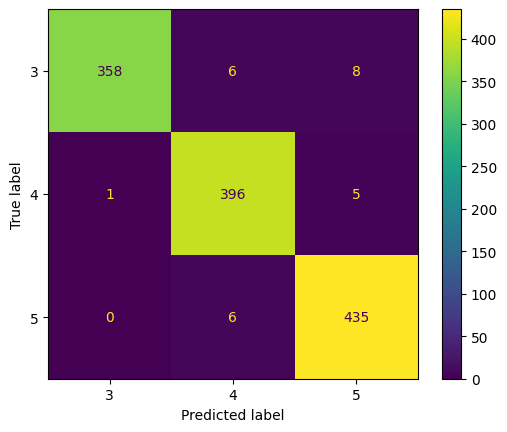

In [70]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_nb.classes_)
disp.plot()
plt.show()

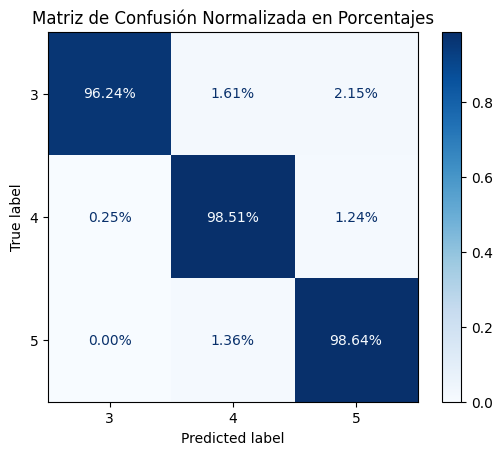

In [71]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Normaliza la matriz de confusión por fila (para obtener porcentajes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el display para mostrar la matriz de confusión con porcentajes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=pipeline_nb.classes_)

# Dibuja la matriz de confusión
disp.plot(cmap=plt.cm.Blues, values_format=".2%")  # 'values_format' muestra los valores como porcentajes
plt.title("Matriz de Confusión Normalizada en Porcentajes")
plt.show()

## Modelo 2: Support Vector Machines (SVM)

Estudiante: Luis Ruiz

Seleccionamos el modelo SVM (Support Vector Machines) debido a su capacidad para manejar problemas de clasificación complejos, especialmente cuando se trabaja con texto, que tiene alta dimensionalidad después de la vectorización. SVM es ideal para este tipo de tarea porque busca encontrar el hiperplano que mejor separa las diferentes clases de datos, en este caso las opiniones que clasificamos según los ODS 3, 4 y 5.

Una de las principales razones por las que SVM es eficaz en nuestro proyecto es que maximiza el margen entre las clases, lo que permite una buena clasificación de las opiniones relacionadas con salud, educación y género. Esto es útil cuando los datos son dispersos o las clases están bien diferenciadas. Gracias a esta capacidad de SVM para encontrar límites precisos entre las clases, resulta una excelente opción para clasificar opiniones textuales de manera eficiente, alineando cada opinión con el ODS correspondiente.

In [72]:
pipeline_svm = Pipeline([
    ('expand_contractions', ExpandContractions()),
    ('tokenize', Tokenizer()),
    ('normalize', NormalizeText()),
    ('stem_and_lemmatize', StemAndLemmatize()),
    ('combine_original_stem_lemma', CombineOriginalStemLemma()),
    ('text_vectorizer', TextVectorizer()),
    ('model', LinearSVC())
])

In [73]:
X = train_df[['Textos_espanol']]
y = train_df['sdg']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Ajuste del pipeline completo
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('expand_contractions', ExpandContractions()),
                ('tokenize', Tokenizer()), ('normalize', NormalizeText()),
                ('stem_and_lemmatize', StemAndLemmatize()),
                ('combine_original_stem_lemma', CombineOriginalStemLemma()),
                ('text_vectorizer', TextVectorizer()), ('model', LinearSVC())])

### Evaluación Modelo

#### Classification Report

In [74]:
# Evaluación del modelo
y_pred = pipeline_svm.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.98      0.99      0.98       372
           4       0.98      0.97      0.98       402
           5       0.98      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



#### Matriz de Confusión

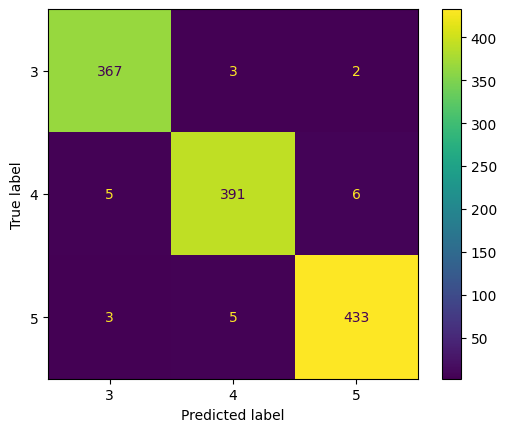

In [75]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_svm.classes_)
disp.plot()
plt.show()

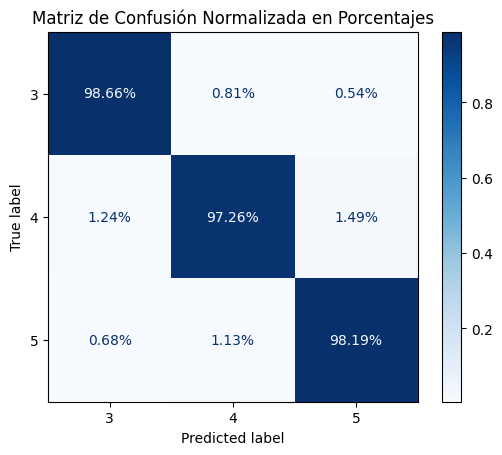

In [76]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Normaliza la matriz de confusión por fila (para obtener porcentajes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el display para mostrar la matriz de confusión con porcentajes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=pipeline_svm.classes_)

# Dibuja la matriz de confusión
disp.plot(cmap=plt.cm.Blues, values_format=".2%")
plt.title("Matriz de Confusión Normalizada en Porcentajes")
plt.show()

#### Cross Validation

In [77]:
# Usar cross_val_score para evaluar la precisión del modelo usando K-fold CV
scores = cross_val_score(pipeline_svm, X, y, cv=5)
print("Precisión de la validación cruzada: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precisión de la validación cruzada: 0.98 (+/- 0.01)


La validación cruzada del modelo SVM mostró una precisión promedio muy alta de 0.98 con una desviación estándar muy baja de ±0.01. Esto nos indica que el modelo es efectivo en clasificar correctamente las observaciones y que su rendimiento es consistente y estable a través de diferentes subconjuntos de datos. La baja variabilidad en los resultados de la validación cruzada sugiere que el modelo generaliza muy bien, lo cual es crucial, porque indica que está manejando eficientemente tanto los sesgos como las varianzas, reduciendo el riesgo de sobreajuste a los datos de entrenamiento.

## Modelo 3: Redes Neuronales

Estudiante: Santiago Navarrete

Decidimos utilizar Redes Neuronales por su capacidad para identificar relaciones y dependencias en secuencias de datos, como ocurre en el texto (las opiniones). A diferencia de otros modelos, las redes pueden tener en cuenta el orden de las palabras, lo que es importante cuando clasificamos opiniones donde el contexto y la estructura afectan el significado y la relación con los ODS.

Para nuestro caso, donde las opiniones deben clasificarse en los ODS 3, 4 y 5, las redes nos ayudan a aprovechar la secuencialidad del texto, mejorando la precisión al identificar patrones contextuales. Al entender cómo una palabra influye en otra dentro de una oración las redes ofrecen una ventaja grande para tareas de clasificación donde el significado global del texto es fundamental, como lo es en la categorización de opiniones relacionadas a la salud, educación y equidad de género.

Implementacion: La red comienza con una capa densa de 512 neuronas, utilizando la función de activación relu, que es ideal para capturar relaciones no lineales en los datos. Para evitar el sobreajuste, se incluye una capa de Dropout que apaga aleatoriamente el 50% de las neuronas durante el entrenamiento. Luego, el modelo tiene una segunda capa densa de 256 neuronas, también con relu, seguida de otra capa de Dropout para mejorar la generalización. La capa de salida tiene 3 neuronas (una para cada ODS: 3, 4 y 5) y utiliza la función de activación softmax, que convierte las salidas en probabilidades. El modelo utiliza la función de pérdida categorical_crossentropy, adecuada para tareas multiclase. Finalmente, la métrica de evaluación utilizada es la precisión (accuracy), lo que permite medir qué tan bien el modelo clasifica las opiniones en las distintas categorías de ODS.


In [78]:
pipeline_red = Pipeline([
    ('expand_contractions', ExpandContractions()),
    ('tokenize', Tokenizer()),
    ('normalize', NormalizeText()),
    ('stem_and_lemmatize', StemAndLemmatize()),
    ('combine_original_stem_lemma', CombineOriginalStemLemma()),
    ('text_vectorizer', TextVectorizer()),
    ('nn_model', KerasClassifier(model=lambda: NeuralNetworkModel.create_model(X.shape[1]), epochs=10, batch_size=32, validation_split=0.2))
])

X = pipeline_red[:-1].fit_transform(train_df)
X = X.toarray()
y = train_df['sdg']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_train_cat = to_categorical(y_train - 3)
y_test_cat = to_categorical(y_test - 3)

pipeline_red[-1].fit(X_train, y_train_cat)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6371 - loss: 0.9266 - val_accuracy: 0.9700 - val_loss: 0.0951
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9920 - loss: 0.0324 - val_accuracy: 0.9683 - val_loss: 0.0824
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0052 - val_accuracy: 0.9753 - val_loss: 0.0654
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9735 - val_loss: 0.0703
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.6801e-04 - val_accuracy: 0.9735 - val_loss: 0.0677
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.5506e-04 - val_accuracy: 0.9771 - val_loss: 0.0655
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.9156e-04 - val_accuracy: 0.9771 - val_loss: 0.0673
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.8304e-04 - val_accuracy: 0

KerasClassifier(
	model=<function <lambda> at 0x7e3e09bcb880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

### Evaluación Modelo

#### Claasification Report

In [80]:
# 6. Predecir las etiquetas del conjunto de prueba
y_pred_cat = pipeline_red[-1].predict(X_test)
y_pred = y_pred_cat.argmax(axis=1) + 3  # Sumar 3 para volver a las etiquetas originales

print(classification_report(y_test, y_pred))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       372
           4       0.97      0.98      0.98       402
           5       0.98      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



#### Matriz de Confusión

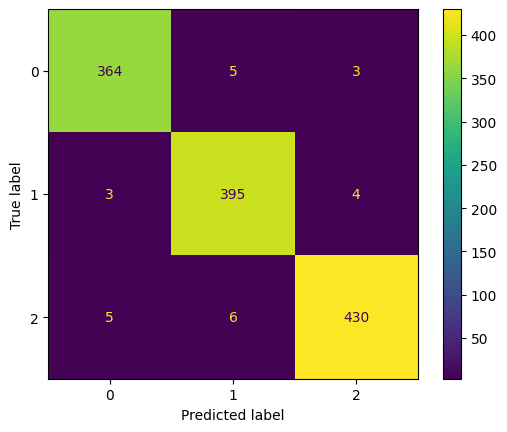

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_red.classes_)
disp.plot()
plt.show()

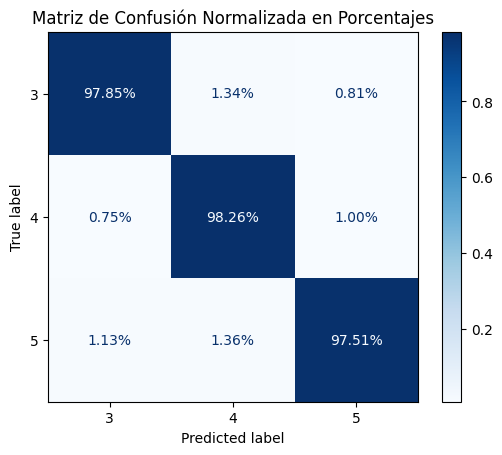

In [82]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Normaliza la matriz de confusión por fila (para obtener porcentajes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el display para mostrar la matriz de confusión con porcentajes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=pipeline_svm.classes_)

# Dibuja la matriz de confusión
disp.plot(cmap=plt.cm.Blues, values_format=".2%")  # 'values_format' muestra los valores como porcentajes
plt.title("Matriz de Confusión Normalizada en Porcentajes")
plt.show()

## Modelo Escogido
El modelo que escogimos es el **SVM** dado su f1-score superior. Después de evaluar distintos algoritmos, incluyendo Naive Bayes y redes neuronales, hemos determinado que el SVM ofrece un mejor equilibrio entre precisión y sensibilidad para nuestro problema específico. Este modelo ha demostrado ser muy efectivo en este entorno que tiene muchas dimensiones y datos no linealmente separables. Además, el SVM tiende a ser menos propenso al sobreajuste en comparación con las redes neuronales, especialmente cuando los conjuntos de datos no son extremadamente grandes. Por otro lado, Naive Bayes, aunque rápido y sencillo, no logró capturar la complejidad de las interacciones entre características tan eficazmente como lo hizo el SVM.

In [83]:
filename = "model-group20.pkl"
dump(pipeline_svm, filename)

['model-group20.pkl']

# **Resultados**

## Resultados Obtenidos

**Classification Report**

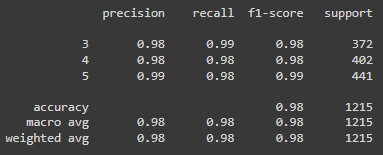

**Matriz de Confusión**

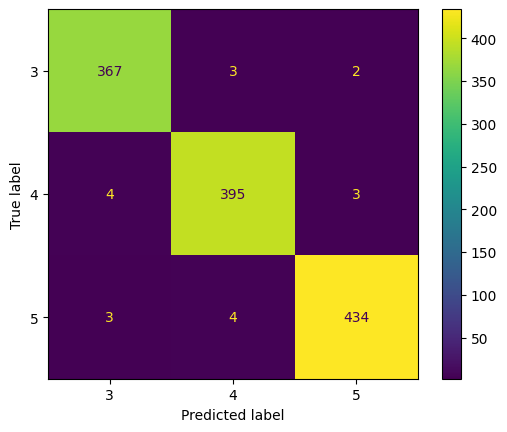

**Matriz de Confusión con Porcentajes**

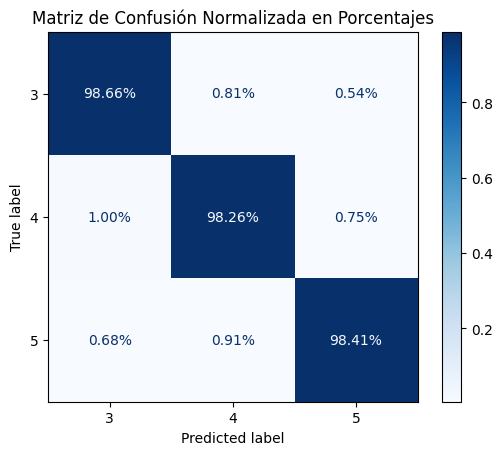


#### 1. **Precisión (Precision)**:
   - La **precisión** mide la proporción de predicciones correctas para una clase específica entre todas las instancias que fueron predichas como pertenecientes a esa clase.
   - En este caso, la precisión es muy alta para todas las clases de ODS: 0.98 para ODS 3 y ODS 4, y 0.99 para ODS 5. Esto significa que cuando el modelo predice una opinión para un ODS en particular, casi siempre es correcto.
   - **Interpretación**: Un alto valor de precisión indica que el modelo tiene muy pocas falsas alarmas (predice correctamente cuando identifica un ODS específico).

#### 2. **Exhaustividad (Recall)**:
   - El **recall** o **exhaustividad** mide la capacidad del modelo para identificar correctamente todas las instancias de una clase. Indica la proporción de verdaderos positivos identificados sobre todas las instancias reales de la clase.
   - En este caso, el recall también es muy alto para todas las clases: 0.99 para ODS 3 y 0.98 para ODS 4 y ODS 5. Esto indica que el modelo es capaz de identificar casi todas las opiniones relevantes para cada ODS.
   - **Interpretación**: Un alto valor de recall significa que el modelo rara vez pierde opiniones que pertenezcan a una clase, lo que es crucial para asegurarse de que ninguna opinión importante sea pasada por alto.

#### 3. **F1-Score**:
   - El **F1-score** es la media armónica de la precisión y el recall, y ofrece una métrica balanceada que toma en cuenta tanto los falsos positivos como los falsos negativos.
   - En este caso, el F1-score es 0.98 para todas las clases, lo que indica un excelente equilibrio entre precisión y recall.
   - **Interpretación**: Un F1-score alto muestra que el modelo tiene un excelente rendimiento general, logrando tanto alta precisión como alta exhaustividad en la clasificación de las opiniones.

#### 4. **Matriz de Confusión**:
   - La **matriz de confusión** muestra la relación entre las predicciones del modelo y las clases reales de las opiniones.
   - La matriz de confusión normalizada en porcentajes muestra que el modelo clasifica correctamente las opiniones en sus respectivas clases con una precisión cercana al 99%. Por ejemplo, el 98.66% de las opiniones clasificadas en ODS 3 son correctas, con solo un pequeño porcentaje de errores de clasificación (0.81% mal clasificadas en ODS 4, y 0.54% en ODS 5).
   - **Interpretación**: La matriz de confusión destaca que los errores son muy bajos, lo que sugiere que el modelo está funcionando de manera óptima. Sin embargo, se observa un pequeño cruce de opiniones entre las clases ODS 3, ODS 4 y ODS 5, lo que indica que algunas opiniones son difíciles de clasificar claramente entre estas categorías.



## Análisis Palabras Importantes

In [84]:
# Acceder al vectorizador y al modelo
vectorizer = pipeline_svm.named_steps['text_vectorizer'].vectorizer
model = pipeline_svm.named_steps['model']

# Obtener los coeficientes del modelo SVM
coeficientes = model.coef_

# Extraer nombres de las características (palabras)
palabras = vectorizer.get_feature_names_out()

importancia_palabras = pd.DataFrame(coeficientes.T, index=palabras, columns=[f'ODS {i+3}' for i in range(coeficientes.shape[0])])

for i in range(coeficientes.shape[0]):
    print(f"Palabras más influyentes para la ODS {i+3}:")
    print(importancia_palabras[f'ODS {i+3}'].sort_values(ascending=False).head(10))
    print("\n")

Palabras más influyentes para la ODS 3:
salud           3.816515
at              2.079511
pacy            1.897449
enfermedades    1.713836
medicos         1.645462
drogas          1.621775
sanitaria       1.445439
consumo         1.433806
hospitales      1.433382
mortalidad      1.428529
Name: ODS 3, dtype: float64


Palabras más influyentes para la ODS 4:
educacion      3.565615
estudiantes    3.267681
escuelas       2.344850
aprendizaje    2.211664
doc            2.123609
escolar        1.909029
profesores     1.822087
habilidades    1.806365
alumnos        1.645400
ensenanza      1.580616
Name: ODS 4, dtype: float64


Palabras más influyentes para la ODS 5:
muj            5.749945
genero         4.656406
mujer          2.541904
ninas          1.955889
derechos       1.761518
violencia      1.686862
igualdad       1.547309
femenina       1.323929
matrimonio     1.266479
empresarias    1.123605
Name: ODS 5, dtype: float64




Los resultados del modelo SVM muestran las palabras más influyentes para cada uno de los ODS (Objetivos de Desarrollo Sostenible) 3, 4, y 5. Este análisis nos permite identificar las palabras clave que están fuertemente asociadas con cada ODS en las opiniones de los ciudadanos, lo que facilita la toma de decisiones y el diseño de estrategias más precisas por parte de la organización.

#### Palabras más Influyentes para ODS 3 (Salud y Bienestar):
- **Palabras claves**: "salud", "enfermedades", "médicos", "hospitales", "drogas", "mortalidad".
- **Análisis**: Las palabras más influyentes están claramente relacionadas con el acceso y la calidad de los servicios de salud, la prevención y tratamiento de enfermedades, y el impacto de la salud en la vida de los ciudadanos. También se mencionan términos relacionados con el uso de sustancias, lo que indica que este es un tema de preocupación para la población.
- **Estrategias**:
  1. **Mejorar el acceso a la atención médica**: Priorizar programas de salud que aumenten el acceso a hospitales y profesionales médicos.
  2. **Prevención de enfermedades**: Implementar campañas de concientización sobre la prevención de enfermedades transmisibles y no transmisibles.
  3. **Abordar el consumo de drogas**: Desarrollar políticas públicas orientadas a la prevención del consumo de drogas y sus efectos en la salud pública.
- **Justificación**: La salud es un pilar clave en los ODS, y comprender cómo los ciudadanos perciben la atención médica, la mortalidad y las enfermedades permite a la organización focalizar mejor sus recursos y diseñar intervenciones que respondan directamente a las necesidades de la población.

#### Palabras más Influyentes para ODS 4 (Educación de Calidad):
- **Palabras claves**: "educación", "estudiantes", "escuelas", "aprendizaje", "profesores", "habilidades", "enseñanza".
- **Análisis**: Estas palabras reflejan una fuerte preocupación por el acceso a la educación, la calidad del aprendizaje, y la capacidad de los estudiantes para desarrollarse dentro de sus escuelas. También resalta el papel crucial que juegan los profesores y la enseñanza en el éxito de los alumnos.
- **Estrategias**:
  1. **Fortalecer la calidad educativa**: Invertir en la formación continua de los profesores y en el mejoramiento de los métodos de enseñanza.
  2. **Acceso a la educación**: Desarrollar programas que garanticen la igualdad de acceso a la educación para estudiantes en zonas rurales o marginadas.
  3. **Promover habilidades y competencias**: Implementar iniciativas educativas que no solo enseñen conocimientos teóricos, sino que también se enfoquen en habilidades prácticas y competencias para el futuro.
- **Justificación**: El acceso y la calidad de la educación son fundamentales para el desarrollo social y económico. Estas palabras clave reflejan los aspectos más urgentes y relevantes que la organización debe abordar para garantizar una educación inclusiva y equitativa.

#### Palabras más Influyentes para ODS 5 (Igualdad de Género):
- **Palabras claves**: "mujer", "género", "niñas", "derechos", "violencia", "igualdad".
- **Análisis**: Las palabras identificadas reflejan la preocupación por los derechos de las mujeres y las niñas, así como por la violencia de género y la igualdad en general.
- **Estrategias**:
  1. **Lucha contra la violencia de género**: Crear y promover campañas de sensibilización contra la violencia hacia las mujeres y las niñas.
  2. **Promover la igualdad de género**: Implementar políticas públicas que promuevan la igualdad de género en todas las esferas sociales y económicas.
- **Justificación**: La igualdad de género es clave para el progreso sostenible. La identificación de palabras como "violencia" y "derechos" resalta la necesidad urgente de abordar temas de desigualdad, violencia y empoderamiento femenino, que son vitales para alcanzar el ODS 5.


En conclusión, el análisis de las palabras más influyentes para los ODS 3, 4, y 5 proporciona información crítica sobre las áreas de preocupación y necesidad de los ciudadanos. Este tipo de análisis permite a la organización (UNFPA y Naciones Unidas) diseñar estrategias basadas en datos reales que reflejan las prioridades y demandas de la población en términos de salud, educación e igualdad de género. Además, el uso de estas palabras clave en campañas, programas y políticas puede mejorar significativamente la alineación de las acciones con los ODS. Y así velar cumplir con el objetivo que para el 2030, las personas de todo el mundo disfruten de paz y prosperidad.

## Etiquetados de Datos (Test)

In [85]:
test_df = pd.read_excel("TestODScat_345.xlsx")
model = load("model-group20.pkl")

In [86]:
test_df['ODS'] = model.predict(test_df)
test_df.head()

# Descargar nuevo archivo csv
test_df.to_csv("particion_prueba_estudiantes.csv", index=False)

# **Mapa de actores relacionado con el producto de datos creado.**

**Fondo de Poblaciones de las Naciones Unidas (UNFPA):**

- **Rol**: Usuario-cliente

- **Importancia**: El UNFPA es el principal usuario del modelo y el actor que más se beneficiará del análisis automatizado de opiniones ciudadanas. Usan los resultados para formular políticas y estrategias dirigidas a los ODS.
  
- **Beneficio**: Facilita la identificación rápida de problemas y necesidades en diferentes comunidades, mejorando la eficiencia en la toma de decisiones.

- **Riesgo**: Si el modelo falla, las decisiones pueden no reflejar adecuadamente las necesidades de las comunidades, comprometiendo la efectividad de sus programas.


**Población / Ciudadanos:**

- **Rol**: Beneficiado

- **Importancia:** Son los principales sujetos de las opiniones analizadas y los beneficiarios directos de las políticas formuladas a partir de los resultados del modelo.

- **Beneficio**: Sus opiniones son tenidas en cuenta en la formulación de políticas, asegurando que las soluciones propuestas se alineen con sus necesidades.

- **Riesgo**: Puede haber desconfianza si sienten que sus opiniones son malinterpretadas o ignoradas debido a errores del modelo.


**Naciones Unidas:**

- **Rol:** Financiador/Beneficiado

- **Importancia:** Utilizan los resultados del modelo para monitorear el progreso hacia los ODS y ajustar estrategias globales, siendo un actor crucial en la evaluación del impacto del proyecto a nivel global.

- **Beneficio:** Mejoran la asignación de recursos y esfuerzos globales, alineándolos con áreas de mayor necesidad según los datos de opiniones ciudadanas.

- **Riesgo:** Basar decisiones estratégicas en modelos incorrectos puede desviar recursos de áreas críticas.


**Desarrolladores de la Aplicación (nosotros):**

- **Rol:** Proveedor

- **Importancia:** Son responsables de la implementación técnica del modelo en plataformas accesibles, asegurando que funcione correctamente y sea accesible para todos los usuarios.

- **Beneficio:** Aseguran la integración y mantenimiento del modelo, garantizando su correcto funcionamiento y usabilidad.

- **Riesgo:** Problemas técnicos o errores en la implementación podrían comprometer la precisión del modelo y la experiencia del usuario.

**Expertos en Análisis de Datos (científicos de datos, nosotros):**

- **Rol:** Proveedor

- **Importancia:** Desempeñan un papel clave en la validación del modelo y el análisis de los resultados para asegurar la calidad y precisión de las decisiones basadas en datos.

- **Beneficio:** Utilizan los datos clasificados para realizar análisis más profundos, ayudando a identificar tendencias y patrones clave.

- **Riesgo:** Dependencia excesiva de resultados del modelo sin validaciones adicionales puede llevar a decisiones basadas en datos incorrectos.

# **Trabajo en Equipo**

**Trabajo en equipo**

En el desarrollo de nuestro proyecto, se asignaron roles específicos para optimizar el proceso y garantizar la eficiencia y calidad del trabajo. Los roles y responsabilidades se distribuyeron de la siguiente manera:

- **Santiago, Líder del Proyecto**: Santiago se encargó de coordinar las reuniones y asegurar que las secciones del proyecto se completaran a tiempo. También fue responsable de la subida final del proyecto. Dedicó aproximadamente 8 horas al proyecto, implementando el modelo de Redes Neuronales.

- **Luis, Líder de Negocio**: Luis tuvo la tarea de asegurar que la solución desarrollada estuviera alineada con los objetivos del negocio. Garantizó que el modelo final fuera comunicable y relevante para los stakeholders. Además, Luis invirtió unas 6 horas en estas actividades, implementando el modelo de SVM (finalmente escogido)

- **Andrea, Líder de Datos y Analítica**: Andrea lideró la preparación de los datos para análisis, asegurando su calidad y limpieza. Además, supervisó el desarrollo de modelos analíticos, incluyendo la implementación del modelo Naive Bayes, y garantizó que los resultados cumplieran con los estándares de calidad requeridos. Andrea dedicó unas 7 horas a sus responsabilidades.

En cuanto a la distribución de puntos, decidimos asignar **33,3 puntos a cada uno**, reflejando una contribución equitativa y significativa al éxito del proyecto. A pesar de los retos enfrentados, el equipo demostró una colaboración eficaz y un compromiso con la calidad y la relevancia del proyecto.

Para futuras entregas, identificamos oportunidades de mejora en cuanto la optimización de nuestros tiempos de reunión para acelerar la toma de decisiones. Esto nos permitirá aumentar la cohesión del equipo y la eficiencia del proyecto.